# Project: Investigate a Medical Appointment No Shows Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#rq1">Research Question 1</a></li>
    <li><a href="#rq2">Research Question 2</a></li>
    <li><a href="#rq3">Research Question 3</a></li>
    <li><a href="#rq4">Research Question 4</a></li>
    <li><a href="#rq5">Research Question 5</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I chose is [Medical Appointment No Shows dataset from Kaggle](https://www.kaggle.com/joniarroba/noshowappointments). It has below features, holding variables about patien scheduled appointments in Brasil. Main feature is `No-Show` telling us if patient showed up to scheduled appointment or not.

* `PatientId` - Identification of a patient;
* `AppointmentID` - Identification of each appointment;
* `Gender` - M=Male, F=Female;
* `AppointmentDay` - The scheduled day of appointment;
* `ScheduledDay` - The day when appointment was scheduled;
* `Age` - How old is the patient;
* `Neighbourhood` - Where the appointment takes place;
* `Scholarship` - 1=Ture, 0=False;
* `Hipertension` - 1=Ture, 0=False;
* `Diabetes` - 1=Ture, 0=False;
* `Alcoholism` - 1=Ture, 0=False;
* `Handcap` - 0 to 4, 0=No handicap;
* `SMS_received` - 1=Ture, 0=False;
* `No-show` - No=Showed up, Yes=Did not show up.

### Questions about this dataset:
* Which features have strongest correlation with `No-show`?
* Is there association between medical conditions reported in this dataset and `No-show`?
* How `No-Show` changes when date difference between `ScheduledDay` and `AppointmentDay` increases?
* Does `No-show` tend to be different on different days of week?
* Are there any neighborhoods with significantly larger or lower `No-show` rate?

In [1]:
# import libraries and call magic words
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid", color_codes = True)

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Let's load the data and see what we can learn without in-depth analysis.

### General Properties

In [2]:
# load data and peek at top rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
# check for null value counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* There are no `null` values in the dataset;
* `ApointmentID` and `PatientId` could be integers, but I'd rather have them as strings so pandas treets them as categorical values;
* `ScheduledDay` and `AppointmentDay` seem to be string, I'd like them to be dates;
* `No-show` could be converted to 0-1 values.

In [4]:
# check descriptive statistics of numeric columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* Min value of `Age` is -1. This suggests we have some empty values there;
* `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism` have small mean values, informing us these are rare conditions;
* `SMS_received` mean of 0.32 informs us 32% patients vere sent SMS reminders. This is lower than expected value. 

In [5]:
# check unique value counts to see if there are any unexpected figures
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* Number of `PatientId`s is a little over the half of `AppointmentId`s and `AppointmentId`s match row count. That looks fine;
* We have 103549 unique `ScheduledDay` values - almost all of them are unique, while we only have 27 unique `AppointmentDay` values. There's something suspicious here;
* `Handcap` has 5 unique values. Initially expected to see 2.

In [6]:
# take a closer look at suspicious columns
print(df['AppointmentDay'].unique(), '\n')
print(df['ScheduledDay'].unique()[:30], '\n')
print(df['Handcap'].unique())

['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z'] 

['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z'
 '2016-04-29T17:29:31Z' '2016-04-29T16:07:23Z' '2016-04-27T08:36:51Z'
 '2016-04-27T15:05:12Z' '2016-04-27T15:39:58Z' '2016-04-29T08:02:16Z'
 '2016-04-27T12:48:25Z' '2016-04-27T14:58:11Z' '2016-04-26T08:44:12Z'
 '2016-04-28T11:33:51Z' '2016-04-28T14:52:07Z' '2016-04-28T10:06:24Z'
 '2016-04-26T08:4

* `AppointmentDay` has no time, while `ScheduledDay` has precise time set;
* `Handcap` is a range of integers. Probably some disability scale.

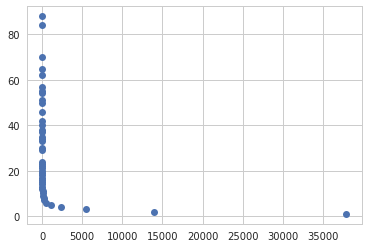

In [7]:
# check how patients distribute over appointment count tey had
# to see if there's a lot of patients that had more than 1 appointment
patient_counts_by_appointment_counts = df.groupby('PatientId').size().value_counts().reset_index().rename(columns = {'index': 'AppointmentCount', 0: 'PatientCount'}).sort_values('AppointmentCount')
plt.plot(patient_counts_by_appointment_counts['PatientCount'], 
         patient_counts_by_appointment_counts['AppointmentCount'],
         'o');

It looks like we have a lot of extreme values for how many appointments patients tend to have. Some patients had over 80 appointments over 27 days we have in our dataset. They shouldn't distort analysis results, but it might be a good idea to look at them separately to see if they differ from the rest of sample in any significant way.

### Data Cleaning

Needed improvements to dataset:

* `AppointmentID`: rename to `AppointmentId`, convert from int to string;
* `PatientId`: convert from float to string;
* `ScheduledDay`: convert from string to date, truncate to days;
* `AppointmentDay`: convert from string to date;
* `No-show`: convert 'yes'-'no' to integer 0-1 (inverse), rename to `Show_up`;
* `Handcap`: rename to `Handicap`;
* `Age`: Remove rows with `Age` < 0.


In [8]:
df_cleaned = df

In [9]:
# convert data types and rename `No-show`
df_cleaned['AppointmentID'] = df_cleaned['AppointmentID'].astype(str)
df_cleaned['PatientId'] = df_cleaned['PatientId'].astype(str)
df_cleaned['ScheduledDay'] = pd.to_datetime(df_cleaned['ScheduledDay']).dt.floor('d')
df_cleaned['AppointmentDay'] = pd.to_datetime(df_cleaned['AppointmentDay'])
df_cleaned['Show_up'] = df_cleaned['No-show'].str.lower().str.contains('no').astype(int)
df_cleaned = df_cleaned.drop('No-show', axis=1)
df_cleaned.rename(columns = {'Handcap': 'Handicap',
                             'AppointmentID': 'AppointmentId'},
                  inplace = True)

In [10]:
# remove rows with invalid `Age`
df_cleaned = df_cleaned.query('Age >= 0')

In [11]:
# peek at dataset changes
df_cleaned.head(10)

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_up
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.59851332313e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.33688164477e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.44983339412e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639472995e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.81245643693e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1


In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null object
AppointmentId     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
Show_up           110526 non-null int64
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 12.6+ MB


In [13]:
df_cleaned.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show_up
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

Let's start by adding some calculated columns to the dataset:

* `Appointment_day_of_week` to keep track of on what day of week appointment was scheduled;
* `Wait_days` to keep track of how many days patient had to wait for the appointment (difference between `ScheduleDay` and `AppointmentDay`).

In [14]:
df_cleaned['Appointment_day_of_week'] = df_cleaned['AppointmentDay'].dt.weekday
df_cleaned['Appointment_day_of_week_name'] = df_cleaned['AppointmentDay'].dt.weekday_name
df_cleaned['Wait_days'] = ((df_cleaned['AppointmentDay'] - df_cleaned['ScheduledDay']) / pd.offsets.Day(1)).astype(int)

In [15]:
# use our new column to see if there's any appointment scheduled after the fact
df_cleaned.query('Wait_days < 0')['AppointmentId'].count()

5

5 rows with `AppointmentDay` ahead of `ScheduledDay`. These need removing.

In [16]:
df_cleaned = df_cleaned.query('Wait_days >= 0')

<a id="rq1"></a>
### Research Question 1: Which features have strongest correlation with `Show_up`?

In [17]:
# Compute the correlation matrix
corr = df_cleaned.corr()
# extract `Show_up` correlations to other features
corrr = corr.loc[:, ['Show_up']]
corrr['abs'] = corrr['Show_up'].abs()
corrr.sort_values('abs', ascending=False)['Show_up']

Show_up                    1.000000
Wait_days                 -0.186320
SMS_received              -0.126502
Age                        0.060320
Hipertension               0.035662
Scholarship               -0.029166
Diabetes                   0.015158
Handicap                   0.006290
Appointment_day_of_week   -0.001189
Alcoholism                 0.000181
Name: Show_up, dtype: float64

From the above numbers it looks like `Wait_days` and `SMS_received` have strongest correlation with `Show_up` and both correlations are negative. 

We can also see much smaller, but positive, `Show_up` correlations with `Age` and medical conditions.

Let's generate correlation heat map from correlation matrix and look at how these features relate to each other.

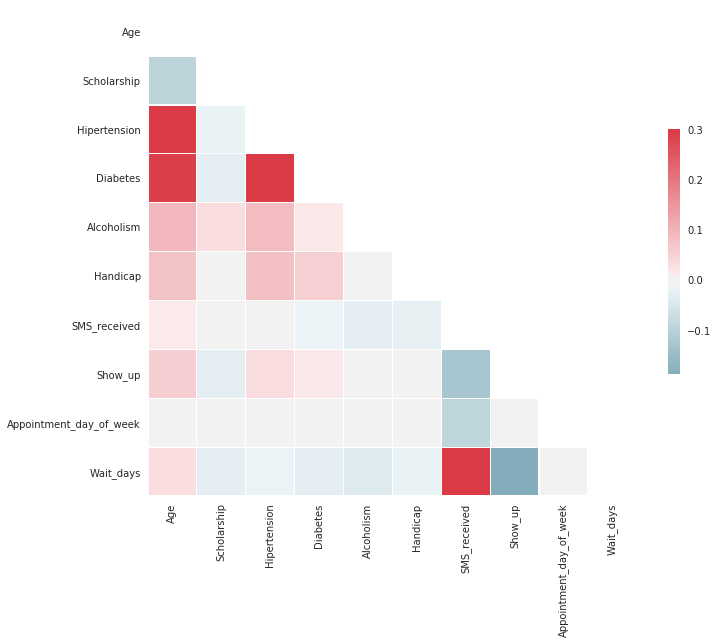

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5});

In above heat map we can see that `SMS_received` has strong positive relationship with `Wait_days`. It's safe to assume that longer waiting patients are more likely to receive SMS messages. 

Let's see  if that's the case and wether long waiting patients are more likely to show up if they received an SMS reminder.

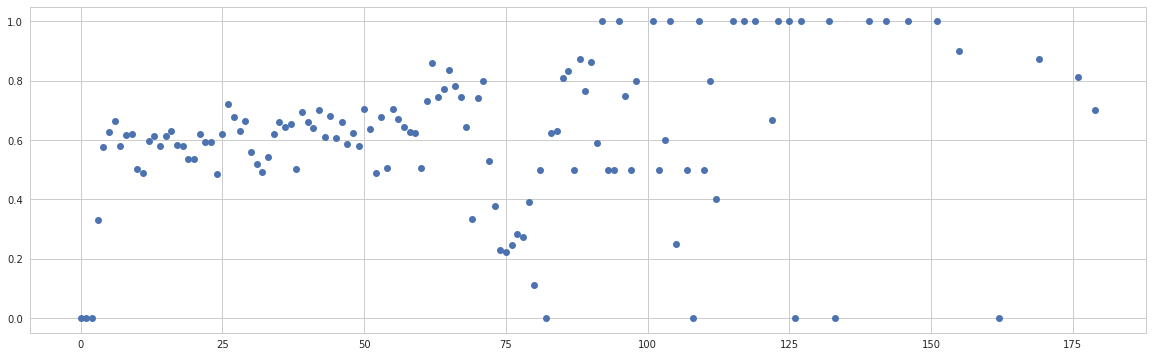

In [19]:
# create dataset with fractions of `SMS_received` and `Show_up` based on `Wait_days`
df_wait_days = df_cleaned[['Wait_days', 'SMS_received']].groupby('Wait_days').mean().reset_index()

#set plot size
fig, ax = plt.subplots(figsize=(20, 6))

# plot `SMS_received` against `Wait_days`
plt.plot(df_wait_days['Wait_days'], df_wait_days['SMS_received'], 'bo');

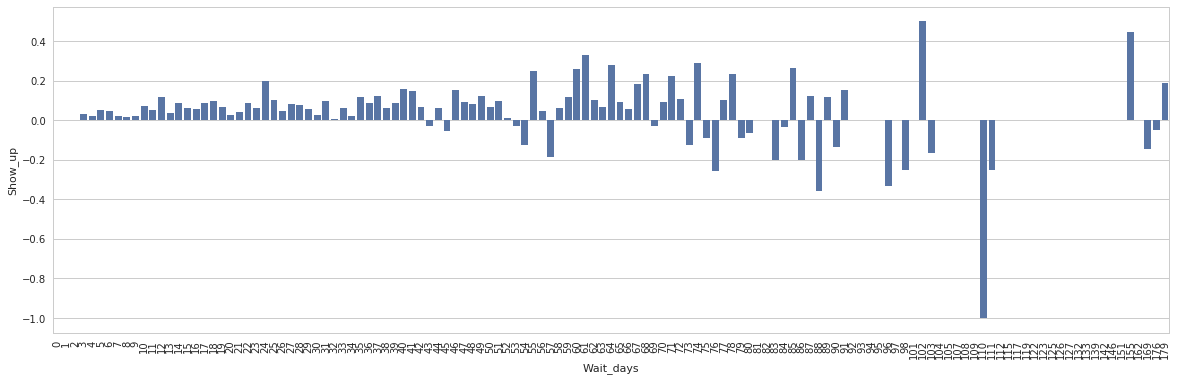

In [20]:
# extract mean `Show_up` based on `Wait_days` and `SMS_received`
df_received = df_cleaned.query('SMS_received == 1')[['Wait_days', 'Show_up']].groupby('Wait_days').mean()
df_not_received = df_cleaned.query('SMS_received == 0')[['Wait_days', 'Show_up']].groupby('Wait_days').mean()

# calculate how much more likely notified patients are to show up
df_show_up_notified = (df_received['Show_up'] - df_not_received['Show_up']).reset_index()

#set plot size
fig, ax = plt.subplots(figsize=(20, 6))

# plot how much more likely patients that received reminder were to show up based on wait time
g = sns.barplot(data=df_show_up_notified, x='Wait_days', y='Show_up', color='b')
g.set_xticklabels(rotation = 90, labels = df_show_up_notified['Wait_days']);

We can see that notified patients are more likely to show up, but effect loses strength over time.

<a id="rq2"></a>
### Research Question 2: Is there association between medical conditions reported in this dataset and `Show_up`?

As we already seen in correlation heatmap that medical conditions have very weak correlation to `Show_up`, let'scheck if there's a difference between long waiting and short waiting patients based on `Wait_days`. Let's use 25 days as a cut-off point for long wait.

In [21]:
# split dataset into long waiting and short waiting patients
df_lt_25d = df_cleaned.query('Wait_days < 25')
df_gte_25d = df_cleaned.query('Wait_days >= 25')

In [22]:
# Compute the correlation matrix
corr_df_lt_25d = df_lt_25d.corr()
# extract `Show_up` correlations to other features
corrr = corr.loc[:, ['Show_up']]
corrr['abs'] = corrr['Show_up'].abs()
corrr.sort_values('abs', ascending=False)['Show_up']

Show_up                    1.000000
Wait_days                 -0.186320
SMS_received              -0.126502
Age                        0.060320
Hipertension               0.035662
Scholarship               -0.029166
Diabetes                   0.015158
Handicap                   0.006290
Appointment_day_of_week   -0.001189
Alcoholism                 0.000181
Name: Show_up, dtype: float64

In [23]:
# Compute the correlation matrix
corr_df_gte_25d = df_gte_25d.corr()
# extract `Show_up` correlations to other features
corrr = corr.loc[:, ['Show_up']]
corrr['abs'] = corrr['Show_up'].abs()
corrr.sort_values('abs', ascending=False)['Show_up']

Show_up                    1.000000
Wait_days                 -0.186320
SMS_received              -0.126502
Age                        0.060320
Hipertension               0.035662
Scholarship               -0.029166
Diabetes                   0.015158
Handicap                   0.006290
Appointment_day_of_week   -0.001189
Alcoholism                 0.000181
Name: Show_up, dtype: float64

It look like short and long waiting patients with medical conditions are equally likely to show up for appointments. There seems to be no meaningful relationship here.

<a id="rq3"></a>
### Research Question 3: How `No-Show` changes when date difference between `ScheduledDay` and `AppointmentDay` increases?

Let's plot a fraction of showed up patients against how many days they had to wait.

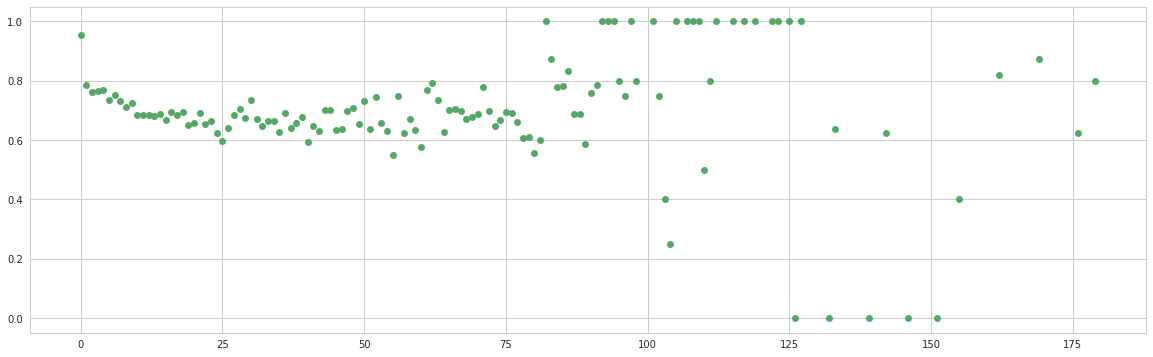

In [24]:
# create dataset with fractions of `Show_up` based on `Wait_days`
df_wait_days = df_cleaned[['Wait_days', 'Show_up']].groupby('Wait_days').mean().reset_index()

#set plot size
fig, ax = plt.subplots(figsize=(20, 6))

# plot `SMS_received` against `Wait_days`
plt.plot(df_wait_days['Wait_days'], df_wait_days['Show_up'], 'go');

In correlation heatpam in question 1 it was already visible `Show_up` has a negative relationship to `Wait_days`. In above visualization we can see this relationship in more detail. We can see that for first 25 days `Show_up` follow neatly packed linear trend, but as `Wait_days` keep increasing value points scatter.

<a id="rq4"></a>
### Research Question 4: Does `No-show` tend to be different on different days of week?

In [63]:
df_grouped_by_day = df_cleaned.groupby(['AppointmentDay', 'Appointment_day_of_week', 'Appointment_day_of_week_name'])['Show_up'].mean().reset_index()
df_grouped_by_day

,AppointmentDay,Appointment_day_of_week,Appointment_day_of_week_name,Show_up
0,2016-04-29,4,Friday,0.804328
1,2016-05-02,0,Monday,0.803245
2,2016-05-03,1,Tuesday,0.804935
3,2016-05-04,2,Wednesday,0.766739
4,2016-05-05,3,Thursday,0.811330
5,2016-05-06,4,Friday,0.795050
6,2016-05-09,0,Monday,0.774729
7,2016-05-10,1,Tuesday,0.769731
8,2016-05-11,2,Wednesday,0.802190
9,2016-05-12,3,Thursday,0.809513


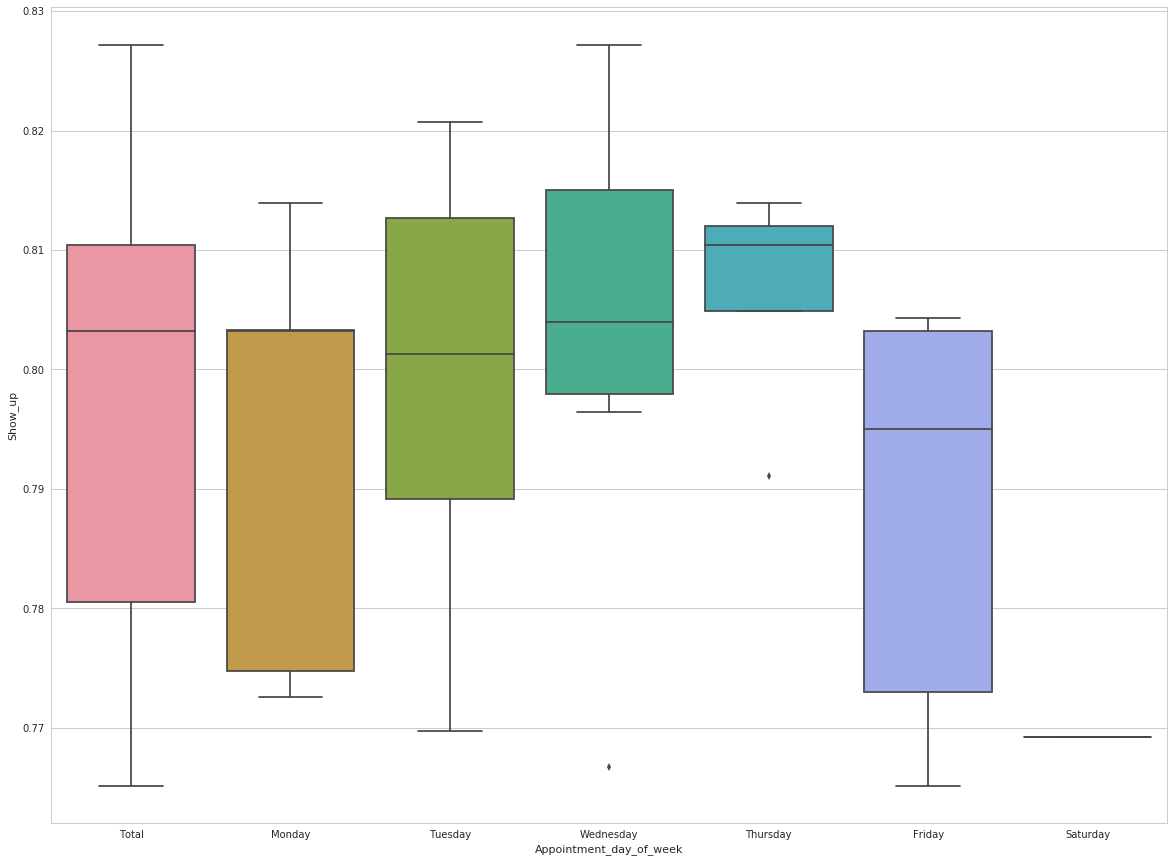

In [26]:
fig, ax = plt.subplots(figsize=(20, 15))

all_days = list(map(lambda x: -1, df_grouped_by_day['Appointment_day_of_week']))
all_days_names = list(map(lambda x: 'Total', df_grouped_by_day['Appointment_day_of_week_name']))
df_all = pd.DataFrame({'Appointment_day_of_week': all_days,
                       'Appointment_day_of_week_name': all_days_names,
                       'Show_up': df_grouped_by_day['Show_up']})
df_joined = pd.concat([df_all, df_grouped_by_day])

# sns.boxplot(data=df_grouped_by_day, y=df_grouped_by_day['Show_up'], ax=ax)
g = sns.boxplot(x = df_joined['Appointment_day_of_week'], y = df_joined['Show_up'], ax = ax)
g.set_xticklabels(labels = df_joined[['Appointment_day_of_week', 'Appointment_day_of_week_name']].sort_values('Appointment_day_of_week')['Appointment_day_of_week_name'].unique());

<a id="rq5"></a>
### Research Question 5: Are there any neighborhoods with significantly larger or lower `Show_up` rate?

In [27]:
df_neighborhoods = df_cleaned.groupby(['AppointmentDay', 'Neighbourhood'])['Show_up'].mean().reset_index()

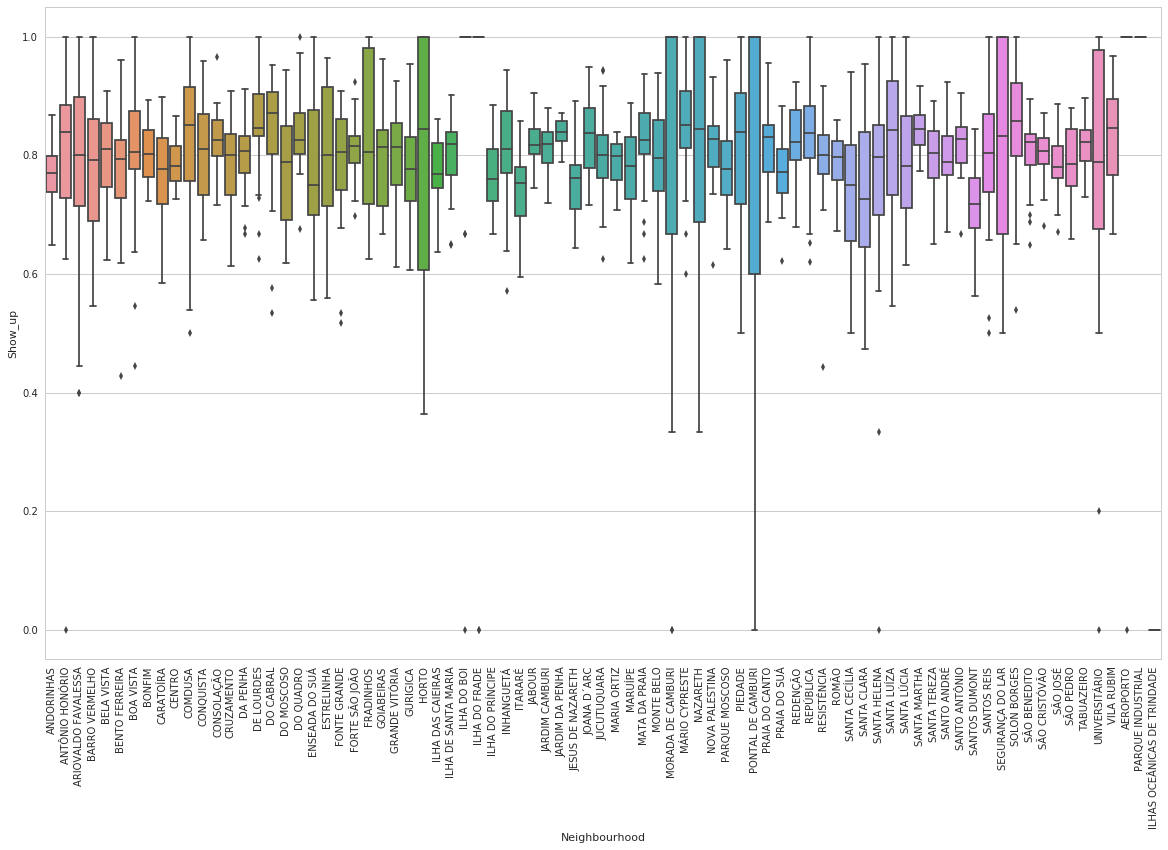

In [28]:
fig, ax = plt.subplots(figsize=(20, 12))
g = sns.boxplot(x = df_neighborhoods['Neighbourhood'], y = df_neighborhoods['Show_up'], ax = ax)
g.set_xticklabels(rotation = 90, labels = df_neighborhoods['Neighbourhood'].unique());

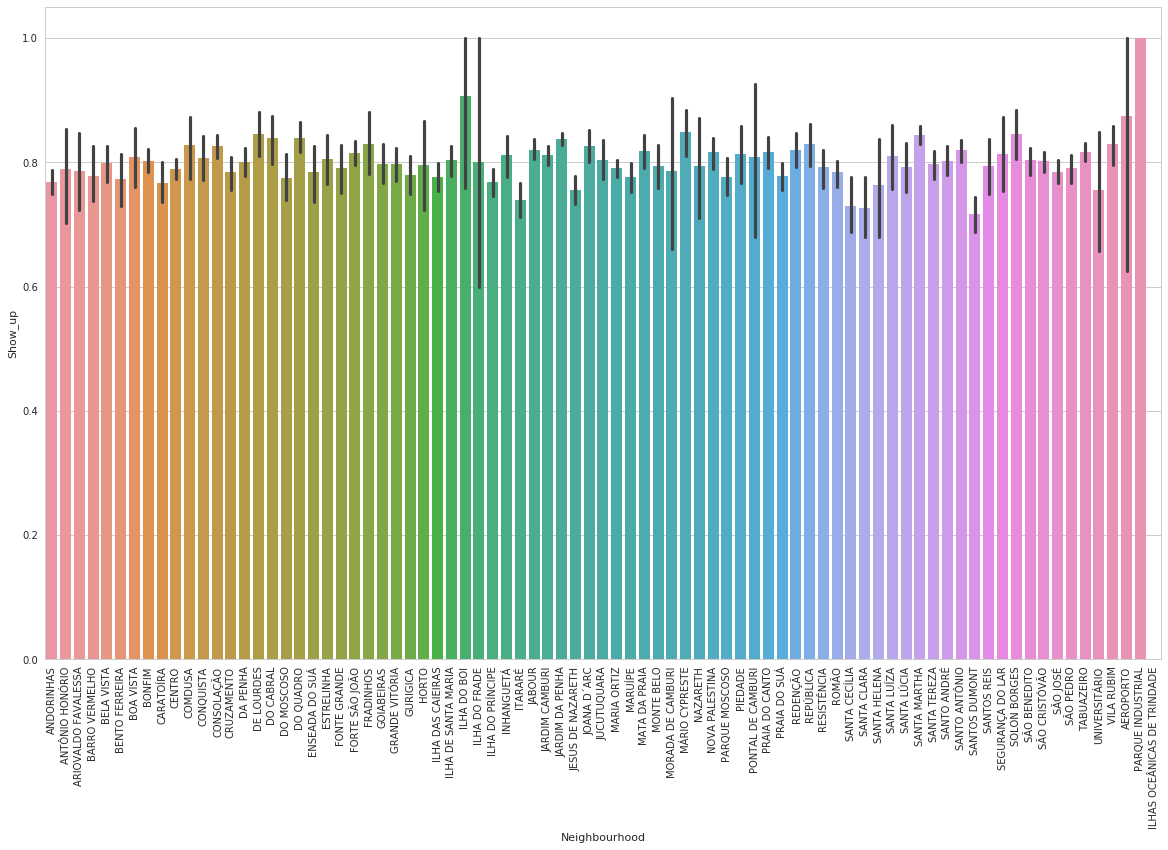

In [29]:
fig, ax = plt.subplots(figsize=(20, 12))
g = sns.barplot(x = df_neighborhoods['Neighbourhood'], y = df_neighborhoods['Show_up'], ax = ax)
g.set_xticklabels(rotation = 90, labels = df_neighborhoods['Neighbourhood'].unique());

In [30]:
from scipy.stats import ttest_ind

In [66]:
population = df_grouped_by_day['Show_up']
xx = df_grouped_by_day.sort_values('Appointment_day_of_week').groupby(['Appointment_day_of_week', 'Appointment_day_of_week_name'])['Show_up'].apply(lambda sample: ttest_ind(population, sample)).reset_index()
xx.drop('Appointment_day_of_week', axis=1, inplace=True)
xx['t'] = xx['Show_up'].apply(lambda x: x[0])
xx['p'] = xx['Show_up'].apply(lambda x: x[1])
xx.drop('Show_up', axis=1, inplace=True)
xx.query('p < 0.05')

/home/marozas/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/marozas/.local/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Appointment_day_of_week_name,t,p


In [58]:
population = df_cleaned.groupby(['AppointmentDay', 'Neighbourhood'])['Show_up'].mean().reset_index()
xx = population.groupby('Neighbourhood')['Show_up'].apply(lambda sample: ttest_ind(population['Show_up'], sample)).reset_index()
xx['t'] = xx['Show_up'].apply(lambda x: x[0])
xx['p'] = xx['Show_up'].apply(lambda x: x[1])
xx.drop('Show_up', axis=1, inplace=True)
xx.query('p < 0.05')

/home/marozas/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/marozas/.local/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Neighbourhood,t,p
31,ILHA DO BOI,-3.744886,0.000186
36,ITARARÉ,2.506841,0.012259
48,MÁRIO CYPRESTE,-2.116964,0.034384
61,SANTA CECÍLIA,2.871890,0.004122
62,SANTA CLARA,3.050134,0.002317
70,SANTOS DUMONT,3.436065,0.000602


In [33]:
###########

In [34]:
df_cleaned.groupby(['Neighbourhood', 'PatientId']).size().reset_index().groupby('Neighbourhood')[0].mean().reset_index().rename(columns = {0: 'mean'}).sort_values('mean', ascending=False).head()

,Neighbourhood,mean
11,COMDUSA,2.094595
33,ILHA DO PRÍNCIPE,2.065634
23,FORTE SÃO JOÃO,2.037756
71,SANTOS REIS,2.025926
60,ROMÃO,2.005435


In [35]:
nbhp = df_cleaned.groupby(['Neighbourhood', 'PatientId']).size().reset_index()

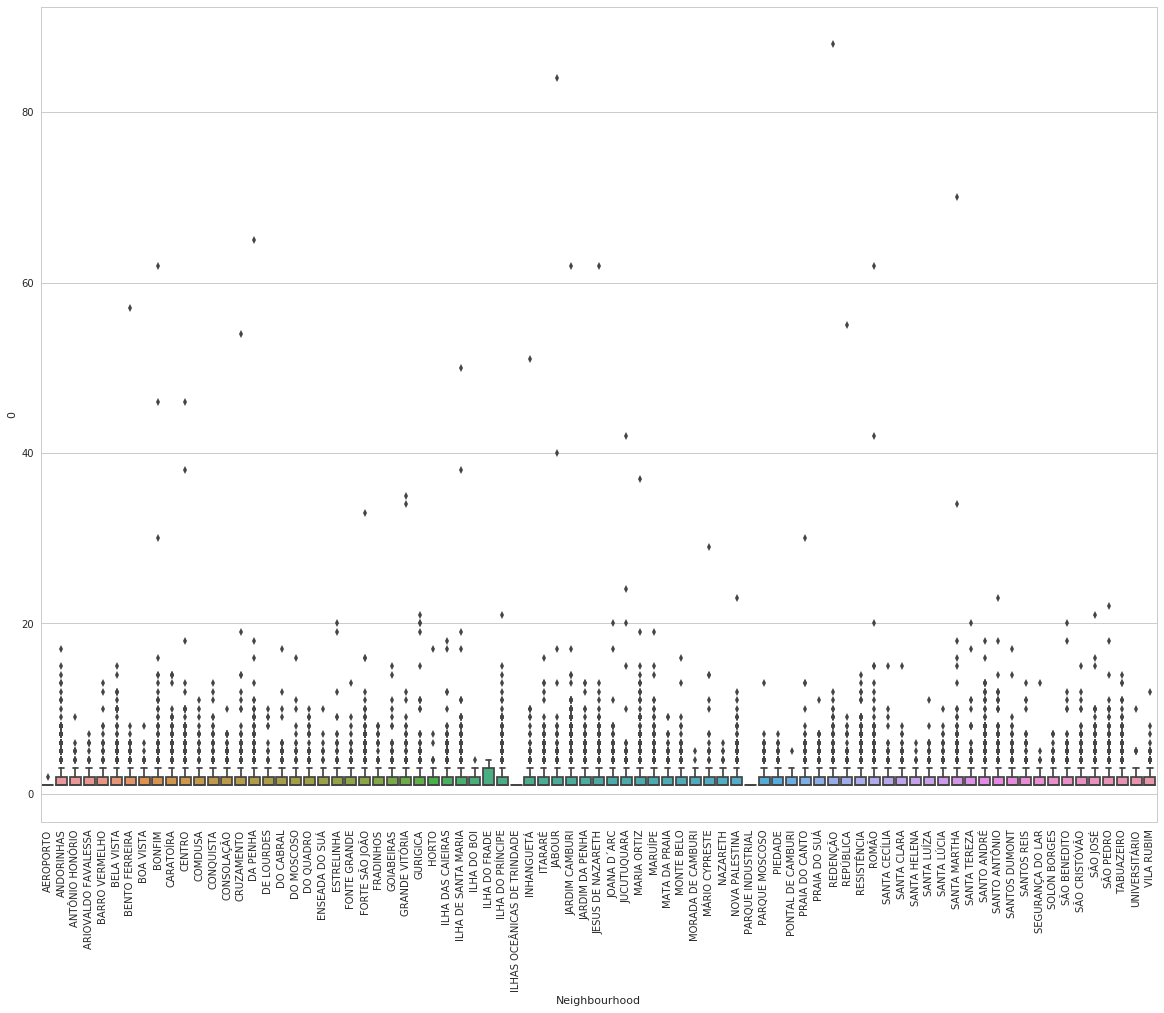

In [36]:
fig, ax = plt.subplots(figsize=(20, 15))
g = sns.boxplot(x = nbhp['Neighbourhood'], y = nbhp[0], ax = ax)
g.set_xticklabels(rotation = 90, labels = nbhp['Neighbourhood'].unique());

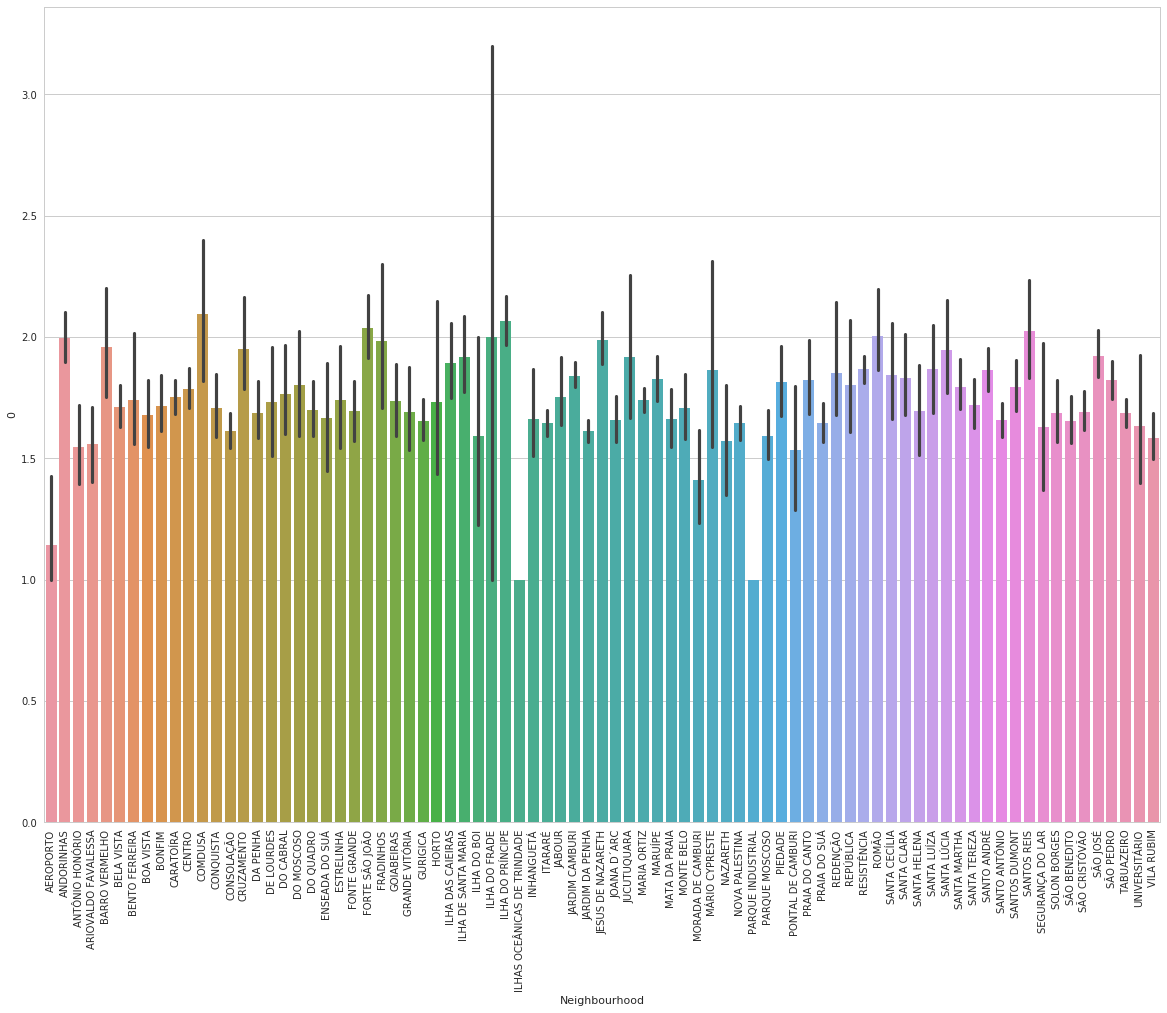

In [37]:
fig, ax = plt.subplots(figsize=(20, 15))
g = sns.barplot(x = nbhp['Neighbourhood'], y = nbhp[0], ax = ax)
g.set_xticklabels(rotation = 90, labels = nbhp['Neighbourhood'].unique());

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [38]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])